In [1]:
# max python 3.12 

In [2]:
pip install -q transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
!python -m pip install wheel

In [4]:
!python -m pip install tensorflow

In [5]:
!pip install tf_keras

In [6]:
!python -m pip install nltk

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
sid = SentimentIntensityAnalyzer()

In [10]:
a = "This is a good movie"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [11]:
a = "This is a GOOD movie"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.5622}

In [12]:
a = "This is a GOOD movie!"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6027}

In [13]:
a = "This is a GOOD movie (: !!!!"
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.333, 'pos': 0.667, 'compound': 0.8402}

In [14]:
my_sent = [
    "This was the best, most awesome movie EVER MADE!!!",
    "This was the worst film ever disgrace the screen",
    "This was the worst movie EVER MADE!!!",
    "It is ok"
]

In [15]:
# Wygenerować kila zdań pozytywnie i negatywnie nacechowanych.
# EDA - pliku TextFiles/amazonreviews.tsv czyścimy dane z braków
# Sprawdzamy jakość modelu z nltk

In [16]:
for sentence in my_sent:
    print(sentence, sid.polarity_scores(sentence))

This was the best, most awesome movie EVER MADE!!! {'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}
This was the worst film ever disgrace the screen {'neg': 0.51, 'neu': 0.49, 'pos': 0.0, 'compound': -0.8074}
This was the worst movie EVER MADE!!! {'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'compound': -0.7163}
It is ok {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}


In [17]:
import pandas as pd

In [18]:
rev = pd.read_csv("./TextFiles/amazonreviews.tsv",sep="\t")

In [19]:
rev

label                                             review
0      pos  Stuning even for the non-gamer: This sound tra...
1      pos  The best soundtrack ever to anything.: I'm rea...
2      pos  Amazing!: This soundtrack is my favorite music...
3      pos  Excellent Soundtrack: I truly like this soundt...
4      pos  Remember, Pull Your Jaw Off The Floor After He...
...    ...                                                ...
9995   pos  A revelation of life in small town America in ...
9996   pos  Great biography of a very interesting journali...
9997   neg  Interesting Subject; Poor Presentation: You'd ...
9998   neg  Don't buy: The box looked used and it is obvio...
9999   pos  Beautiful Pen and Fast Delivery.: The pen was ...

[10000 rows x 2 columns]

In [20]:
rev["label"].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [21]:
print(rev.shape)
print(rev.dropna().shape)

(10000, 2)
(10000, 2)


In [22]:
my_score = rev["review"].apply(lambda x: sid.polarity_scores(x))

In [23]:
my_score

0       {'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...
1       {'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...
2       {'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...
3       {'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...
4       {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...
                              ...                        
9995    {'neg': 0.017, 'neu': 0.846, 'pos': 0.136, 'co...
9996    {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...
9997    {'neg': 0.084, 'neu': 0.754, 'pos': 0.162, 'co...
9998    {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...
9999    {'neg': 0.028, 'neu': 0.811, 'pos': 0.161, 'co...
Name: review, Length: 10000, dtype: object

In [24]:
pd.DataFrame(my_score.to_list())

neg    neu    pos  compound
0     0.088  0.669  0.243    0.9454
1     0.018  0.837  0.145    0.8957
2     0.040  0.692  0.268    0.9858
3     0.090  0.615  0.295    0.9814
4     0.000  0.746  0.254    0.9781
...     ...    ...    ...       ...
9995  0.017  0.846  0.136    0.9610
9996  0.000  0.868  0.132    0.9544
9997  0.084  0.754  0.162    0.9102
9998  0.091  0.909  0.000   -0.3595
9999  0.028  0.811  0.161    0.9107

[10000 rows x 4 columns]

In [25]:
rev_ = pd.concat([rev, pd.DataFrame(my_score.to_list())],axis=1)

In [26]:
rev_

label                                             review    neg    neu  \
0      pos  Stuning even for the non-gamer: This sound tra...  0.088  0.669   
1      pos  The best soundtrack ever to anything.: I'm rea...  0.018  0.837   
2      pos  Amazing!: This soundtrack is my favorite music...  0.040  0.692   
3      pos  Excellent Soundtrack: I truly like this soundt...  0.090  0.615   
4      pos  Remember, Pull Your Jaw Off The Floor After He...  0.000  0.746   
...    ...                                                ...    ...    ...   
9995   pos  A revelation of life in small town America in ...  0.017  0.846   
9996   pos  Great biography of a very interesting journali...  0.000  0.868   
9997   neg  Interesting Subject; Poor Presentation: You'd ...  0.084  0.754   
9998   neg  Don't buy: The box looked used and it is obvio...  0.091  0.909   
9999   pos  Beautiful Pen and Fast Delivery.: The pen was ...  0.028  0.811   

        pos  compound  
0     0.243    0.9454  
1     0.145    0.8957  
2     0.268    0.9858  
3     0.295    0.9814  
4     0.254    0.9781  
...     ...       ...  
9995  0.136    0.9610  
9996  0.132    0.9544  
9997  0.162    0.9102  
9998  0.000   -0.3595  
9999  0.161    0.9107  

[10000 rows x 6 columns]

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
LabelEncoder().fit_transform(rev["label"])

array([1, 1, 1, ..., 0, 0, 1])

In [29]:
X = pd.DataFrame(my_score.to_list())
y = pd.DataFrame(LabelEncoder().fit_transform(rev["label"]))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
c = 0.5
print(accuracy_score(y_pred=(X_train["compound"]>c).astype(int), y_true=y_train))
print(accuracy_score(y_pred=(X_test["compound"]>c).astype(int), y_true=y_test))

0.7395714285714285
0.765


In [34]:
score = []
test_score = []
for c in np.linspace(-1,1,1000):
    score.append(accuracy_score(y_pred=(X_train["compound"]>c).astype(int), y_true=y_train))
    test_score.append(accuracy_score(y_pred=(X_test["compound"]>c).astype(int), y_true=y_test))

In [35]:
space = np.linspace(-1,1,1000)

In [36]:
np.argmax(score)

np.int64(810)

In [37]:
c = space[np.argmax(score)]
c

np.float64(0.6216216216216217)

In [38]:
accuracy_score(y_pred=(X_train["compound"]>c).astype(int), y_true=y_train)

0.7498571428571429

In [39]:
accuracy_score(y_pred=(X_test["compound"]>c).astype(int), y_true=y_test)

0.763

In [40]:
import matplotlib.pyplot as plt

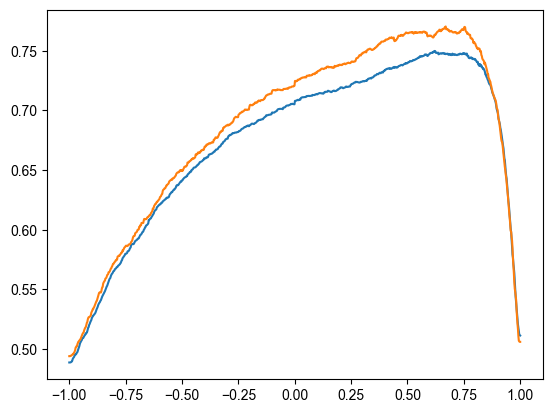

In [41]:
plt.plot(space, score)
plt.plot(space, test_score)

In [42]:
rev2 = pd.read_csv("./TextFiles/moviereviews.tsv",sep="\t")

In [43]:
rev2["label"].value_counts()

label
neg    1000
pos    1000
Name: count, dtype: int64

In [44]:
print(rev2.shape)
print(rev2.dropna().shape)

(2000, 2)
(1965, 2)


In [45]:
rev2

label                                             review
0      neg  how do films like mouse hunt get into theatres...
1      neg  some talented actresses are blessed with a dem...
2      pos  this has been an extraordinary year for austra...
3      pos  according to hollywood movies made in last few...
4      neg  my first press screening of 1998 and already i...
...    ...                                                ...
1995   pos  i like movies with albert brooks , and i reall...
1996   pos  it might surprise some to know that joel and e...
1997   pos  the verdict : spine-chilling drama from horror...
1998   pos  i want to correct what i wrote in a former ret...
1999   pos  a couple of months ago , when i first download...

[2000 rows x 2 columns]

In [46]:
rev2 = rev2.dropna()

In [47]:
my_score2 = rev2["review"].apply(lambda x: sid.polarity_scores(x))

In [48]:
my_score2

0       {'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...
1       {'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...
2       {'neg': 0.068, 'neu': 0.781, 'pos': 0.15, 'com...
3       {'neg': 0.071, 'neu': 0.782, 'pos': 0.147, 'co...
4       {'neg': 0.091, 'neu': 0.817, 'pos': 0.093, 'co...
                              ...                        
1995    {'neg': 0.073, 'neu': 0.763, 'pos': 0.164, 'co...
1996    {'neg': 0.238, 'neu': 0.688, 'pos': 0.074, 'co...
1997    {'neg': 0.15, 'neu': 0.702, 'pos': 0.147, 'com...
1998    {'neg': 0.131, 'neu': 0.71, 'pos': 0.16, 'comp...
1999    {'neg': 0.071, 'neu': 0.741, 'pos': 0.189, 'co...
Name: review, Length: 1965, dtype: object

In [49]:
X2 = pd.DataFrame(my_score2.to_list())

In [50]:
print(accuracy_score(y_pred=(X2["compound"]>c).astype(int), 
                     y_true=pd.DataFrame(LabelEncoder().fit_transform(rev2["label"]))))


0.6442748091603053


In [51]:
y2 = pd.DataFrame(LabelEncoder().fit_transform(rev2["label"]))

In [52]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [53]:
score = []
test_score = []
for c in np.linspace(-1,1,1000):
    score.append(accuracy_score(y_pred=(X_train2["compound"]>c).astype(int), 
                                y_true=y_train2))
    test_score.append(accuracy_score(y_pred=(X_test2["compound"]>c).astype(int), 
                                     y_true=y_test2))

In [54]:
space = np.linspace(-1,1,1000)

In [55]:
np.argmax(score)

np.int64(989)

In [56]:
c = space[np.argmax(score)]
c

np.float64(0.97997997997998)

In [57]:
accuracy_score(y_pred=(X_train2["compound"]>c).astype(int), y_true=y_train2)

0.6814545454545454

In [58]:
accuracy_score(y_pred=(X_test2["compound"]>c).astype(int), y_true=y_test2)

0.6847457627118644

In [59]:
import matplotlib.pyplot as plt

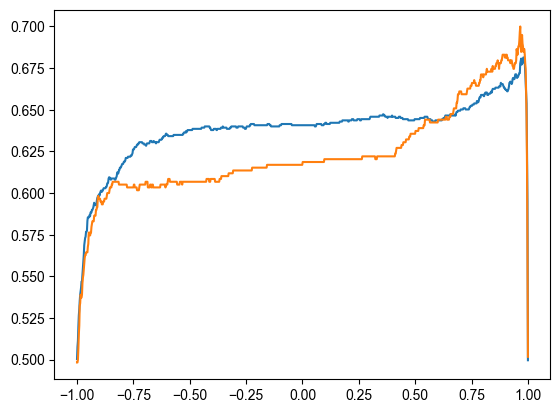

In [60]:
plt.plot(space, score)
plt.plot(space, test_score)

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

C:\Users\dell\Documents\AK\MFoDL\.venv3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7726666666666666

In [62]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train.astype(float))
accuracy_score(y_pred=(clf.predict(X_test)>0.5).astype(int), y_true=y_test)

0.7833333333333333

In [63]:
score_LR = []
test_score_LR = []
for c in np.linspace(0,1,1000):
    score_LR.append(accuracy_score(y_pred=(clf.predict(X_train)>c).astype(int), 
                                y_true=y_train))
    test_score_LR.append(accuracy_score(y_pred=(clf.predict(X_test)>c).astype(int), 
                                     y_true=y_test))

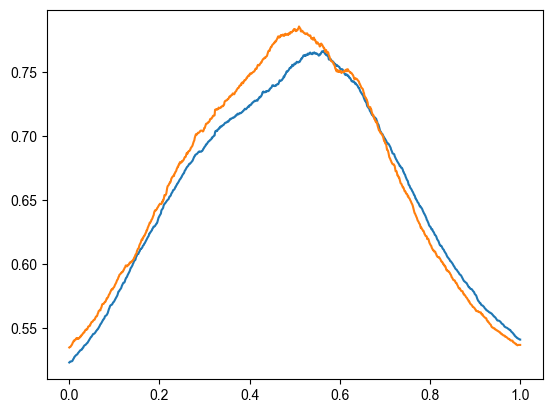

In [64]:
plt.plot(np.linspace(0,1,1000), score_LR)
plt.plot(np.linspace(0,1,1000), test_score_LR)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(15)
clf.fit(X_train, y_train)
accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

C:\Users\dell\Documents\AK\MFoDL\.venv3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7706666666666667

In [66]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(150)
clf.fit(X_train, y_train)
accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

C:\Users\dell\Documents\AK\MFoDL\.venv3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7763333333333333

In [67]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [68]:
my_score_sm = rev["review"].iloc[:].apply(lambda x: sentiment_pipeline(x)[0])

In [69]:
my_score_sm_label = LabelEncoder().fit_transform(pd.DataFrame(my_score_sm.to_list())["label"])

In [71]:
accuracy_score(my_score_sm_label,LabelEncoder().fit_transform(rev["label"].iloc[:]))

0.9013

In [ ]:
rev["label"].iloc[:100].value_counts()

In [87]:
pip install --upgrade transformers sentencepiece datasets[audio]

Note: you may need to restart the kernel to use updated packages.


In [92]:
!pip install -q kokoro>=0.9.2 soundfile
!apt-get -qq -y install espeak-ng > /dev/null 2>&1
from kokoro import KPipeline
from IPython.display import display, Audio
import soundfile as sf
import torch
pipeline = KPipeline(lang_code='a')
text = '''
[Kokoro](/kˈOkəɹO/) is an open-weight TTS model with 82 million parameters. Despite its lightweight architecture, it delivers comparable quality to larger models while being significantly faster and more cost-efficient. With Apache-licensed weights, [Kokoro](/kˈOkəɹO/) can be deployed anywhere from production environments to personal projects.
'''
generator = pipeline(text, voice='af_heart')
for i, (gs, ps, audio) in enumerate(generator):
    print(i, gs, ps)
    display(Audio(data=audio, rate=24000, autoplay=i==0))
    sf.write(f'{i}.wav', audio, 24000)

  DEPRECATION: Building 'docopt' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'docopt'. Discussion can be found at https://github.com/pypa/pip/issues/6334
System nie moľe odnale«† okre�lonej �cieľki.


ImportError: 
CustomAlbert requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFCustomAlbert".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.
